## 의사결정 트리_Decision Tree 알고리즘-연습문제

### 데이터 세트
- UCI Machine Learning 저장소의 독일 신용 데이터를 통해 결정트리 분류 분석 수행

### 의사결정 트리 알고리즘 사용 신용 등급 예측 모델링 
- 의사결정 트리 그래프
- 모델링
- 하이퍼 파라미터 튜닝
- 성능평가지표 출력
- 피처 중요도 확인 


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# 데이터 로드
import pandas as pd
credit = pd.read_csv('../../data/credit_final.csv')
credit.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [122]:
# 결측치 확인
credit.info()
# 없음 
# 결측치 처리 따로 진행 안한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

In [118]:
# 레이블
# 신용등급에 대한 데이터 이므로 credit.rating을 레이블로 설정한다.
credit['credit.rating'].value_counts()
# 1 또는 0
# 1: 좋은 신용등급
# 0: 나쁜 신용등급

# 레이블 데이터
label_data = credit['credit.rating']


# 피처 데이터
feature_data = credit.drop('credit.rating', axis=1)
feature_data.head(2)

credit.rating
1    700
0    300
Name: count, dtype: int64

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1


0      1
1      1
2      2
3      1
4      1
      ..
995    1
996    1
997    3
998    2
999    1
Name: account.balance, Length: 1000, dtype: int64

In [121]:
# 비이상적인 0값 확인

for f in feature_data.columns:
     print(feature_data[f].value_counts())
# 결과
# 비이상적인 0값은 관측되지 않았으므로 
# 따로 처리해주지 않는다.

account.balance
3    457
1    274
2    269
Name: count, dtype: int64
credit.duration.months
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
45      5
39      5
7       5
14      4
13      4
28      3
33      3
54      2
22      2
16      2
5       1
47      1
26      1
72      1
40      1
Name: count, dtype: int64
previous.credit.payment.status
2    530
3    381
1     89
Name: count, dtype: int64
credit.purpose
3    364
4    352
2    181
1    103
Name: count, dtype: int64
credit.amount
1258     3
1275     3
1393     3
1262     3
1478     3
        ..
1346     1
10477    1
2924     1
1961     1
6350     1
Name: count, Length: 923, dtype: int64
savings
1    603
4    183
3    111
2    103
Name: count, dtype: int64
employment.duration
2    339
4    253
1    234
3    174
Name: count, dtype: int64
installment.rate
4    476
2    231
3    157
1    136
Name: count,

In [22]:
# 데이터 세트 분리
from sklearn.model_selection import train_test_split


# 학습/테스트 데이터 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(feature_data, 
                                                    label_data, 
                                                    test_size=0.2, 
                                                    random_state=11)

In [97]:
# 의사결정 트리  분류기 생성 및 학습
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test) # 예측

DecisionTreeClassifier(random_state=156)

<Figure size 1000x700 with 0 Axes>

[Text(0.5, 0.8333333333333334, 'account.balance <= 2.5\ngini = 0.417\nsamples = 800\nvalue = [237, 563]'),
 Text(0.25, 0.5, 'credit.duration.months <= 22.5\ngini = 0.492\nsamples = 433\nvalue = [189, 244]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'credit.amount <= 4158.0\ngini = 0.227\nsamples = 367\nvalue = [48, 319]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

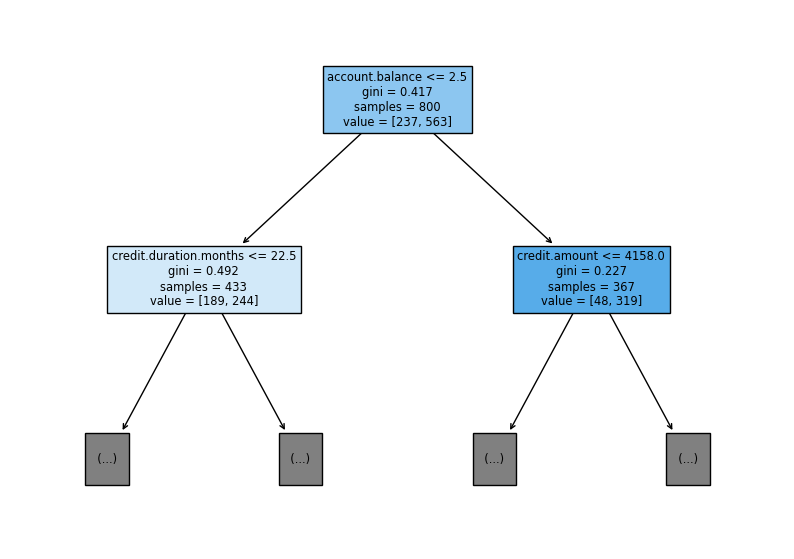

In [112]:
# 트리 그래프 출력
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt_clf, max_depth = 1,  filled=True, feature_names = feature_data.columns)
plt.show()

트리 그래프 설명
- max_depth = 1 인 경우
- 분할 규칠 : x[0] <= 2.5
- x[0] 첫번째 피쳐 데이터인  account.balance <= 2.5이면 왼쪽, 크면 오른쪽
- 샘플 800개
- 분할 결과 : 왼쪽 리프노드 433개 오른쪽 리프노드 367개

In [111]:
feature_data.columns

Index(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')

In [58]:
# samples= 800 개
y_train.size
y_train.shape

800

(800,)

<Figure size 1000x700 with 0 Axes>

[Text(0.5860337808098591, 0.9722222222222222, 'x[0] <= 2.5\ngini = 0.417\nsamples = 800\nvalue = [237, 563]'),
 Text(0.32127530809859156, 0.9166666666666666, 'x[1] <= 22.5\ngini = 0.492\nsamples = 433\nvalue = [189, 244]'),
 Text(0.11894806338028169, 0.8611111111111112, 'x[2] <= 1.5\ngini = 0.443\nsamples = 245\nvalue = [81, 164]'),
 Text(0.043133802816901406, 0.8055555555555556, 'x[10] <= 3.5\ngini = 0.408\nsamples = 21\nvalue = [15, 6]'),
 Text(0.022007042253521125, 0.75, 'x[4] <= 386.0\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.014964788732394365, 0.6944444444444444, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.029049295774647887, 0.6944444444444444, 'x[11] <= 1.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.022007042253521125, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03609154929577465, 0.6388888888888888, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.06426056338028169, 0.75, 'x[8] <= 2.0\ngini = 0.49\nsamples = 7

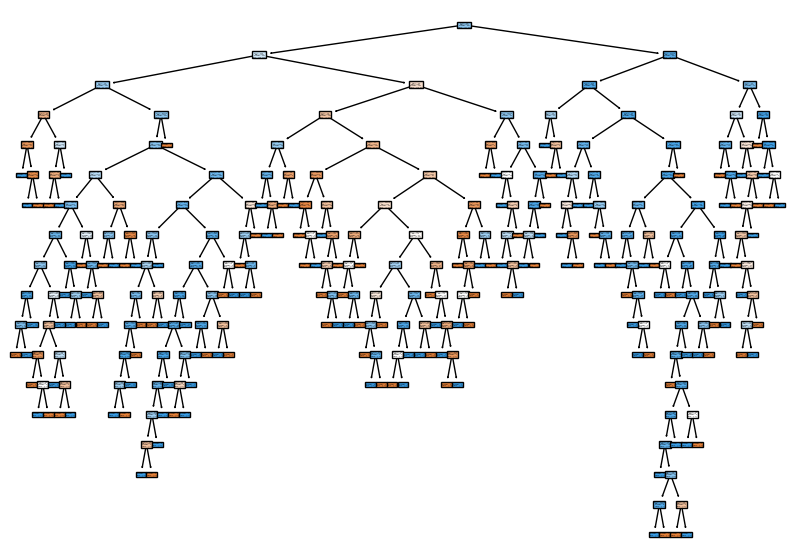

In [60]:
# 전부 분할했을때 
plt.figure(figsize=(10,7))
plot_tree(dt_clf, filled=True)
plt.show()

## 하이퍼 파라미터 튜닝
- 과적합을 막기 위해 하이퍼 파라미터 사용
- GridSearchCV 클래스 이용해서 튜닝

DecisionTreeClassifier(max_depth=4, random_state=156)

<Figure size 1000x700 with 0 Axes>

[Text(0.5, 0.9, 'account.balance <= 2.5\ngini = 0.417\nsamples = 800\nvalue = [237, 563]'),
 Text(0.25, 0.7, 'credit.duration.months <= 22.5\ngini = 0.492\nsamples = 433\nvalue = [189, 244]'),
 Text(0.125, 0.5, 'previous.credit.payment.status <= 1.5\ngini = 0.443\nsamples = 245\nvalue = [81, 164]'),
 Text(0.0625, 0.3, 'residence.duration <= 3.5\ngini = 0.408\nsamples = 21\nvalue = [15, 6]'),
 Text(0.03125, 0.1, 'gini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.09375, 0.1, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.1875, 0.3, 'credit.amount <= 8724.5\ngini = 0.416\nsamples = 224\nvalue = [66, 158]'),
 Text(0.15625, 0.1, 'gini = 0.405\nsamples = 220\nvalue = [62, 158]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.375, 0.5, 'savings <= 2.5\ngini = 0.489\nsamples = 188\nvalue = [108, 80]'),
 Text(0.3125, 0.3, 'credit.purpose <= 1.5\ngini = 0.456\nsamples = 148\nvalue = [96, 52]'),
 Text(0.28125, 0.1, 'gini = 0.434\nsamples = 22\nvalue = [7, 15]'

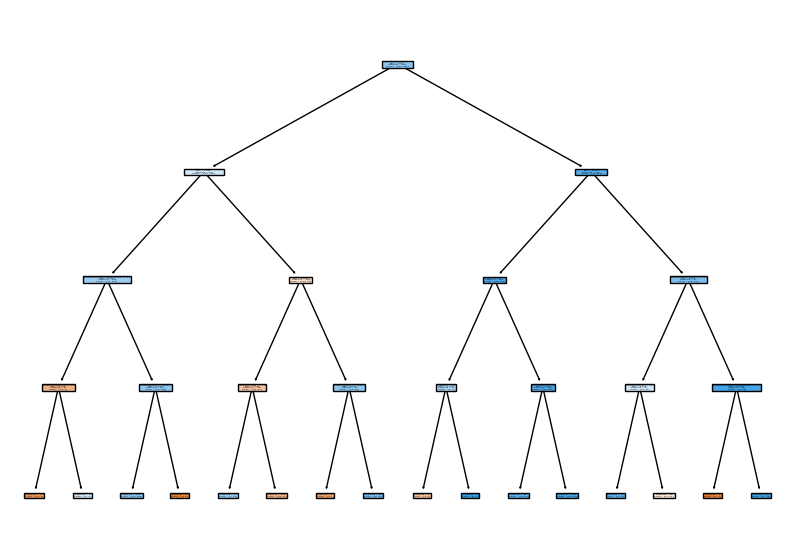

In [109]:
# 결정트리 하이퍼 파라미터 튜닝1
# max_depth = 4
from sklearn.tree import DecisionTreeClassifier


dt_clf = DecisionTreeClassifier(max_depth=4, random_state=156)
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(10,7))
plot_tree(dt_clf, filled=True,feature_names = feature_data.columns)
plt.show()

In [75]:
# 그래프 결과
# 왼쪽 오른쪽 모두 지니계수 0인 리프노드가 일부 생성되어 레이블 분류되었다.
# 대부분은 지니계수가 0 초과인 리프노드가 생성되었다.
# max_depth=4 로 한정해서 간결한 결정트리를 만들었다.
# 하지만 분류 결과가 아직 많은 데이터들이 섞여있기 때문에
# 과적합은 방지되나, 
# 분류효과는 기대하기 어렵다.

DecisionTreeClassifier(min_samples_split=10, random_state=156)

<Figure size 1000x700 with 0 Axes>

[Text(0.5714225871313673, 0.9722222222222222, 'account.balance <= 2.5\ngini = 0.417\nsamples = 800\nvalue = [237, 563]'),
 Text(0.3137567024128686, 0.9166666666666666, 'credit.duration.months <= 22.5\ngini = 0.492\nsamples = 433\nvalue = [189, 244]'),
 Text(0.1390750670241287, 0.8611111111111112, 'previous.credit.payment.status <= 1.5\ngini = 0.443\nsamples = 245\nvalue = [81, 164]'),
 Text(0.06702412868632708, 0.8055555555555556, 'residence.duration <= 3.5\ngini = 0.408\nsamples = 21\nvalue = [15, 6]'),
 Text(0.05630026809651475, 0.75, 'credit.amount <= 386.0\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.045576407506702415, 0.6944444444444444, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06702412868632708, 0.6944444444444444, 'current.assets <= 1.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.05630026809651475, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0777479892761394, 0.6388888888888888, 'gini = 0.0\nsamples = 12\nvalue = [12

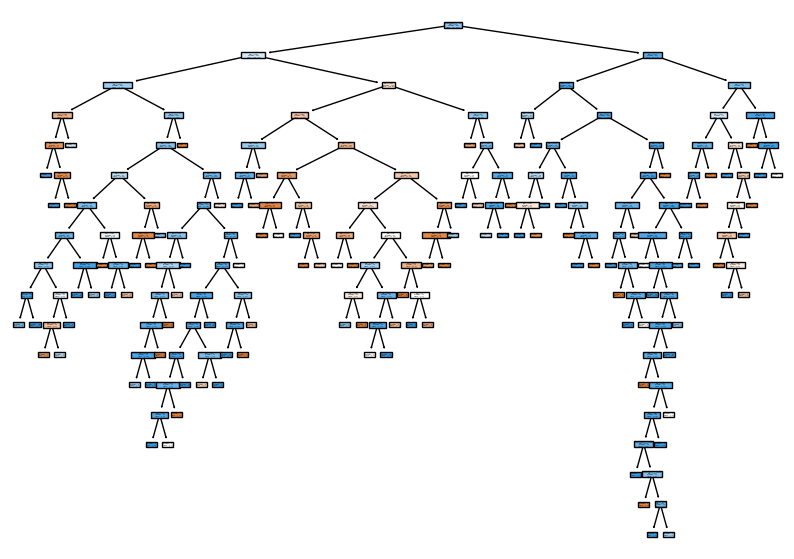

In [107]:
# 결정트리 하이퍼 파라미터 튜닝2
# min_samples_split=10

dt_clf = DecisionTreeClassifier(min_samples_split=10, random_state=156)
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(10,7))
plot_tree(dt_clf, filled=True, feature_names = feature_data.columns)
plt.show()

# 그래프 결과
# 샘플수가 10이하 인경우 섞여있어도 분할 안하도록 제어했음
# 그런데도 트리 깊이가 엄청나게 깊음을 알수 있음
# 복잡한 결정트리가 생성되었다.
# 따라서 , 과적합 방지 효과를 긍정적으로 예측하기 어렵다.

DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

<Figure size 1000x700 with 0 Axes>

[Text(0.5770089285714286, 0.9642857142857143, 'account.balance <= 2.5\ngini = 0.417\nsamples = 800\nvalue = [237, 563]'),
 Text(0.32304495073891626, 0.8928571428571429, 'credit.duration.months <= 22.5\ngini = 0.492\nsamples = 433\nvalue = [189, 244]'),
 Text(0.15332512315270935, 0.8214285714285714, 'previous.credit.payment.status <= 1.5\ngini = 0.443\nsamples = 245\nvalue = [81, 164]'),
 Text(0.09975369458128079, 0.75, 'residence.duration <= 3.5\ngini = 0.408\nsamples = 21\nvalue = [15, 6]'),
 Text(0.08990147783251232, 0.6785714285714286, 'occupation <= 2.5\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.08004926108374384, 0.6071428571428571, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.09975369458128079, 0.6071428571428571, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.10960591133004927, 0.6785714285714286, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.20689655172413793, 0.75, 'credit.amount <= 8724.5\ngini = 0.416\nsamples = 224\nvalue = [66, 158]'),
 Te

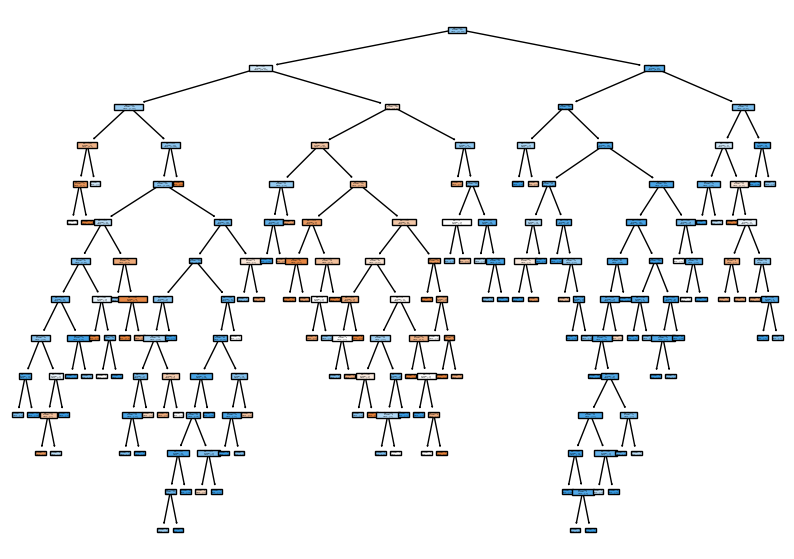

In [139]:
# 결정 트리 하이퍼 파라미터 튜닝3
# 리프노드가 될 수 있는 최소 샘플수 설정(분할 조건 : 분할자격 샘플 수)
# min_samples_leaf=4 로 설정 (최소4개는 있어야지 리프 노드가 될수 있음)

dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(10,7))
plot_tree(dt_clf, filled=True,feature_names = feature_data.columns)
plt.show()

# 그래프 결과
# 최소 4개는 있어야 리프노드가 될수 있도록 설정했는데, 
# 트리가 깊게 분할하였다.
# 따라서 , 과적합 방지 효과를 긍정적으로 예측하기 어렵다.

In [ ]:
# GridSearchCV 클래스 이용해서 튜닝
import

## 성능평가지표 출력

In [95]:
# 평가 수행 : 다양한 평가지표로 수행
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, y_pred, pred_proba):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
     # 오차행렬
    print('오차행렬 : ', cm)
    # 정확도, 정밀도, 재현율, F1
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f},  F1 : {f1:.4f}, ROC_AUC : {roc_auc:.4f}")

In [134]:
# label이 1일때 예측 확률
pred_proba = dt_clf.predict_proba(X_test)[:, 1]

# 함수 실행
get_clf_eval(y_test, y_pred, pred_proba)

오차행렬 :  [[33 30]
 [38 99]]
정확도: 0.6600, 정밀도: 0.7674, 재현율: 0.7226,  F1 : 0.7444, ROC_AUC : 0.7581


In [148]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:


NameError: name 'classification_report' is not defined

In [147]:
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=X_train.columns, class_names=['Good', 'Bad'],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('credit_tree', format='png', cleanup=True)
graph.view('credit_tree')

NameError: name 'graphviz' is not defined

## 피처 중요도 확인

In [138]:
# 피쳐 중요도 1
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt_clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                           Feature  Importance
0                  account.balance    0.389258
1           credit.duration.months    0.132644
5                          savings    0.105682
4                    credit.amount    0.099139
2   previous.credit.payment.status    0.090089
3                   credit.purpose    0.085481
6              employment.duration    0.053120
10              residence.duration    0.017974
12                             age    0.016440
16                      occupation    0.010174
8                   marital.status    0.000000
9                        guarantor    0.000000
7                 installment.rate    0.000000
11                  current.assets    0.000000
13                   other.credits    0.000000
14                  apartment.type    0.000000
15                    bank.credits    0.000000
17                      dependents    0.000000
18                       telephone    0.000000
19                  foreign.worker    0

In [124]:
# feature중요도 2

# feature_data.columns.tolist() # feature data 를 list로 출력
# dt_clf.feature_importances_ # feature data 중요도

for name, value in zip(feature_data.columns.tolist(), dt_clf.feature_importances_):
    print('{0} : {1: .3f}'.format(name, value))

account.balance :  0.389
credit.duration.months :  0.133
previous.credit.payment.status :  0.090
credit.purpose :  0.085
credit.amount :  0.099
savings :  0.106
employment.duration :  0.053
installment.rate :  0.000
marital.status :  0.000
guarantor :  0.000
residence.duration :  0.018
current.assets :  0.000
age :  0.016
other.credits :  0.000
apartment.type :  0.000
bank.credits :  0.000
occupation :  0.010
dependents :  0.000
telephone :  0.000
foreign.worker :  0.000


<Axes: >

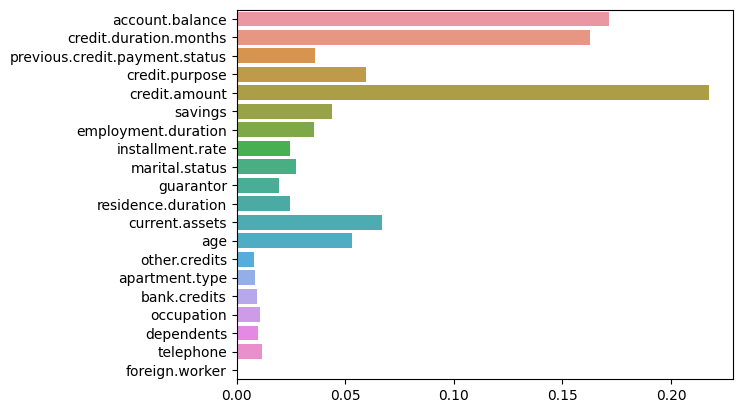

In [145]:
# feature_importances_를 컬럼별로 시각화
import seaborn as sns
sns.barplot(x=dt_clf.feature_importances_, y=feature_data.columns)
# 정렬하자

### 조정

In [99]:
# 데이터 	credit.amount가 다른 피쳐들보다 범위가 큼
# 스케일링을 진행한다.

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.head()

# test data scaling
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.973567,1.274682,1.163750,1.070229,1.730079,1.773557,-1.295574,0.933676,0.606788,-0.342518,1.039338,0.615761,-0.743001,0.464549,-1.713933,1.333333,0.151209,-0.413888,1.218389,-0.204124
1,0.973567,0.026422,1.163750,0.028644,-0.327095,-0.737674,-1.295574,-0.827977,-1.260252,-0.342518,-1.674929,0.615761,-0.221597,0.464549,-1.713933,-0.750000,0.151209,-0.413888,-0.820756,-0.204124
2,-1.437745,0.276074,1.163750,1.070229,-0.667595,0.099403,0.506964,0.933676,0.606788,-0.342518,-1.674929,-1.286205,-0.829902,0.464549,0.169510,1.333333,0.151209,-0.413888,1.218389,-0.204124
3,-0.232089,1.274682,-0.469583,-2.054527,2.245372,-0.737674,-1.295574,-1.708803,1.540308,-0.342518,1.039338,0.615761,-0.656100,0.464549,-1.713933,-0.750000,1.682442,-0.413888,1.218389,-0.204124
4,0.973567,-0.472883,-0.469583,1.070229,-0.012032,0.936480,0.506964,-0.827977,-1.260252,-0.342518,0.134582,0.615761,-1.351306,0.464549,-1.713933,-0.750000,0.151209,-0.413888,-0.820756,-0.204124


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.169249,-0.887215,1.059784,0.064022,0.419915,-0.703928,0.478780,-1.066265,0.517606,-0.217072,1.078267,-0.364711,1.450200,0.531085,0.000000,-0.808018,0.129960,-0.484322,-0.833616,-0.160128
1,-0.169249,-0.804951,-0.476135,1.048981,1.298315,1.795226,-1.362681,-2.031211,-1.399454,-0.217072,-0.749304,-1.324476,-1.077585,0.531085,-1.924501,-0.808018,-2.927933,-0.484322,-0.833616,-0.160128
2,-0.169249,0.182214,1.059784,-1.905895,1.391326,0.962174,1.399511,-1.066265,-1.399454,-0.217072,1.078267,1.554820,-0.609477,0.531085,-1.924501,-0.808018,0.129960,-0.484322,-0.833616,-0.160128
3,-0.169249,1.662962,-2.012054,-1.905895,1.887275,-0.703928,-1.362681,-2.031211,0.517606,-0.217072,-0.749304,1.554820,1.824686,-1.882938,1.924501,-0.808018,1.658907,-0.484322,1.199593,-0.160128
4,-1.336487,-0.804951,-2.012054,1.048981,-0.779795,-0.703928,-0.441951,0.863626,0.517606,-0.217072,1.078267,0.595055,1.169335,-1.882938,0.000000,1.237597,0.129960,-0.484322,-0.833616,-0.160128


In [103]:
# scaling한 학습 데이터로 재학습
dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=156)

In [105]:
# label 값이 1일 때 예측 확률
pred_proba_scaled = dt_clf.predict_proba(X_test_scaled)[:, 1]

# 함수 실행 -평가지표
get_clf_eval(y_test, y_pred, pred_proba_scaled)

오차행렬 :  [[33 30]
 [38 99]]
정확도: 0.6600, 정밀도: 0.7674, 재현율: 0.7226,  F1 : 0.7444, ROC_AUC : 0.6427


In [ ]:
# scaling결과

# 이전
오차행렬 :  [[33 30]
 [38 99]]
정확도: 0.6600, 정밀도: 0.7674, 재현율: 0.7226,  F1 : 0.7444, ROC_AUC : 0.6232


# 이후
오차행렬 :  [[33 30]
 [38 99]]
정확도: 0.6600, 정밀도: 0.7674, 재현율: 0.7226,  F1 : 0.7444, ROC_AUC : 0.6427
                    
# 스케일링후 ROC_AUC가 약 0.02 증가했다. 다른 수치는 변화 없음
# 이유
# 수치 1개 정도밖에 스케일링안했기 때문에 큰 변화가 없는 것